<a href="https://colab.research.google.com/github/sainathreddy1999/saicreatefile/blob/master/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
In this demo, let's try to code the simple problem of linear regression on this dataset: https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset. It has two columns, years of experience and salary. Our task is to predict the salary (Y) given the years of experience (X). 
We will do this using sklearn. Sklearn is a machine learning library that has python packages for several machine learning tasks. We will progressively see how to use this library as we go along the course. 
The most important thing to remember is that the library documentation https://scikit-learn.org/stable/ is the best resource you can turn to, to learn. Let's begin!

### 1. Importing required libraries 

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import linear_model 
from sklearn.preprocessing import MinMaxScaler

### 2. Loading the dataset 

In [0]:
data = pd.read_csv('Salary_Data.csv')
print(data.head())
scaler = MinMaxScaler() # we scale the dataset because the magnitude of values in both columns differ a lot 
data[data.columns] = scaler.fit_transform(data[data.columns])
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
   YearsExperience    Salary
0         0.000000  0.019041
1         0.021277  0.100094
2         0.042553  0.000000
3         0.095745  0.068438
4         0.117021  0.025514


In [0]:
x = data['YearsExperience']
y = data['Salary']
# split into test and training set 
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=24)

### 3. Visualization of data 

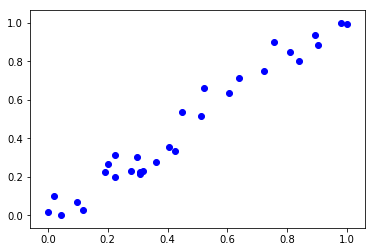

In [0]:
plt.scatter(x,y,color='blue')

### 4. Building the linear regression model 

In [0]:
reg = linear_model.LinearRegression(normalize=True)
x_train = np.asarray(x_train)
x_train = x_train.reshape(-1,1)
res = reg.fit(x_train,y_train)
print('Predicted Coefficient Value: ', reg.coef_)
print('Predicted Intercept Value: ', reg.intercept_)

Predicted Coefficient Value:  [1.0698821]
Predicted Intercept Value:  -0.030257125307575683


### 5. Visualizing the resultant model - a line in this case |

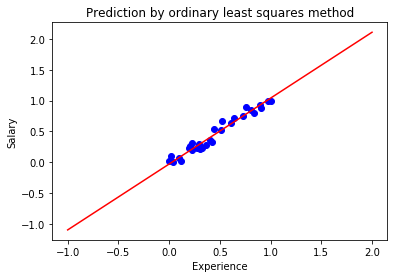

In [0]:
%matplotlib inline
x_lin = np.linspace(y.min()-1,y.max()+1)
plt.scatter(x,y,c='b')
plt.title('Prediction by ordinary least squares method')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.plot(x_lin,(reg.intercept_+(reg.coef_*x_lin)),color='r',label='Predicted')
plt.show()

### 6. Making predictions for test set 

In [0]:
y_pred = reg.predict(x_test.values.reshape(-1,1))

### 7. Evaluating the model with some measures 

In [0]:
print("RMSE: ",math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R^2: ",metrics.r2_score(y_test,y_pred))

RMSE:  5563.742150504675
R^2:  0.9520702017424296
